# Creating a Stock Trading Algorithm using Data Analysis & Machine Learning

## Motivation & Introduction

According to Reuters, The world's 20 best-performing hedge funds earned $65.4 billion for clients in 2021. Consindering the mention of an interest rate hike during that time and the Covid-19 pandemic, I was suprised as to how  multiple hedge funds had just posted their best year-end return in the last decade. As a beginner trader myself, I was having a hard time predicting when a company's stock price would go up, so I was marvelled at how hedge funds were doing what I struggled with so accurately and earn millions of dollars in profit in doing so. I then realized they were doing something that I wasn't: Technical analysis. Although these hedge funds go through a large amount of data and create multiple indicators in completing their own technical analysis, I wondered whether I could actually turn a profit by trading based on my own technical analysis. 


The purpose of this study is to use **machine learning and data analysis to evaluate the extent of the advantage technical analysis provides traders**. Specifically, I will be focusing on **swing trading using the 5, 8, and 13 day moving averages**. Below are some links on what these moving averages are. 


https://corporatefinanceinstitute.com/resources/knowledge/other/moving-average/#:~:text=A%20moving%20average%20is%20a%20technical%20indicator%20that%20investors%20and,traders%20to%20generate%20trading%20signals.

https://www.investopedia.com/articles/active-trading/010116/perfect-moving-averages-day-trading.asp#:~:text=5%2D%2C%208%2D%20and%2013,wait%20for%20more%20favorable%20conditions.


To summarize these articles, a moving average is a statistic used to display the average change in a stock price over a specific time. I will focus on using **simple moving averages over a 5, 8, and 13 day period of time**. The trading strategy as illustrated in the articles above in regards to the 5-8-13 SMA's are as follows: when the 5 day moving average overlaps the 8 or 13 day moving average, it is indicative of an increase ( 5 day SMA crosses above 8 day SMA) or decrease (5 day SMA dips below 8 day SMA) in stock price




## Specific Objectives

Listed below are the specific ways I plan to test where trading using technical indicators provides an advantage to traders

1. Plot the graph of Apple's stock price over at least 1 year and **utilize data analysis to indicate buy and sell positions** using the 5, 8 and 13 length moving averages.
2. **Utilize machine learning** by implementing a **random forest classification model** to test whether the machine can determine buy or sell positions on its own.
3. Apply a **natural language processing (NLP)** algorithm to implement a **twitter sentiment analyzer** for a stock on a specific trading day
4. Combine all of this information and **use data analysis** to determine whether trading using technical indicators truly provide an advantage to traders. 

## Data Collection

In [14]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import snscrape.modules.twitter as sntwitter
import nltk
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

The dataset I'm using can be found here: https://www.kaggle.com/datasets/borismarjanovic/daily-and-intraday-stock-price-data. I will specifically be using the daily stock data for Apple. 

First I'm going to load the stock data and isolate the price and date information. Instead of making the index based on how many elements (0... 254), it will be the date of the closing price. The first thing I need to do is to convert the dates from strings to Datetime objects. 

In [15]:
df = pd.read_csv("AAPL.csv") #reading data from excel file
date_price = df["Close"]
date_price.index = df["Date"]
date_price.index = pd.to_datetime(date_price.index) #converting dataframe index to be dates
display(date_price)

Date
2021-08-12    148.889999
2021-08-13    149.100006
2021-08-16    151.119995
2021-08-17    150.190002
2021-08-18    146.360001
                 ...    
2022-08-08    164.869995
2022-08-09    164.919998
2022-08-10    169.240005
2022-08-11    168.490005
2022-08-12    172.100006
Name: Close, Length: 253, dtype: float64

Next we have to calculate the 5,8, and 13-day moving averages. In this study we will be calculating the **Simple Moving Average (SMA)** which is calculated by taking the mean of a particular stock's price over a specified period of time. The pandas library has a rolling function which allows us to easily calculate the price of a stock over any specified time, before taking the cumulative mean. 

In [16]:
eight_day = date_price.rolling(window=8).mean()
five_day = date_price.rolling(window=5).mean()
thirteen_day = date_price.rolling(window=13).mean()

Now let us put this data in a DataFrame for easier visualization. 

In [17]:
price_averages = pd.DataFrame({
    'Close' : date_price,
    "8 day" : eight_day,
    "5 day" : five_day,
    "13 day" : thirteen_day
})
print(price_averages)

                 Close       8 day       5 day      13 day
Date                                                      
2021-08-12  148.889999         NaN         NaN         NaN
2021-08-13  149.100006         NaN         NaN         NaN
2021-08-16  151.119995         NaN         NaN         NaN
2021-08-17  150.190002         NaN         NaN         NaN
2021-08-18  146.360001         NaN  149.132001         NaN
...                ...         ...         ...         ...
2022-08-08  164.869995  162.942499  164.434000  159.563076
2022-08-09  164.919998  163.888748  165.416000  160.299230
2022-08-10  169.240005  164.730000  166.038000  161.464615
2022-08-11  168.490005  165.602501  166.574002  162.660000
2022-08-12  172.100006  167.113752  167.924002  164.236923

[253 rows x 4 columns]


**Note** how the average only starts accumulating after the specific period of time for each moving average has gone by.

Let us try plotting what we have so far using matplotlib. I will only plot the first 70 values (for visual purposes) so we can see when the moving averages cross the stock price

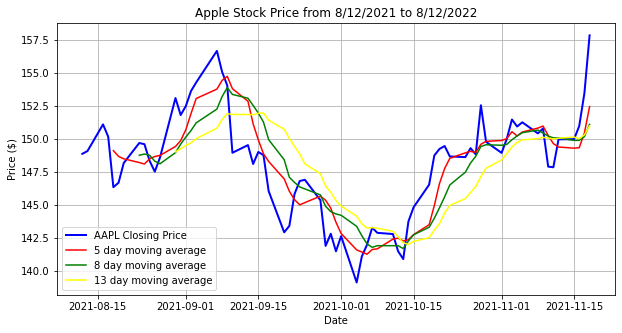

In [18]:
plt.plot(date_price.iloc[0:70], label= 'AAPL Closing Price', color= "blue", linewidth = 2)
plt.plot(five_day.iloc[0:70], label= '5 day moving average', color= "red", linewidth = 1.5)
plt.plot(eight_day.iloc[0:70], label= '8 day moving average', color= "green", linewidth = 1.5)
plt.plot(thirteen_day.iloc[0:70], label= '13 day moving average', color= "yellow", linewidth = 1.5)
plt.grid()
plt.title("Apple Stock Price from 8/12/2021 to 8/12/2022")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

## Buy/Sell Indicators

Now let us add buy sell indicators to the graph. The 8-15-13 moving average indicator states that when the 5 day SMA is going in a **uptrend manner** and crosses the 8 day SMA it is indicative of a **buy signal.** Similarily, when the 5-day SMA **dips below** the 8 day SMA it is indicative of a **sell signal**

We can use the where function as part of the numpy toolbase to create our signals

In [19]:
price_averages["Position"] = np.where((price_averages["5 day"] > price_averages["8 day"]), 1.0 , -1.0)
display(price_averages)

,Close,8 day,5 day,13 day,Position
Date,,,,,
2021-08-12,148.889999,NaN,NaN,NaN,-1.0
2021-08-13,149.100006,NaN,NaN,NaN,-1.0
2021-08-16,151.119995,NaN,NaN,NaN,-1.0
2021-08-17,150.190002,NaN,NaN,NaN,-1.0
2021-08-18,146.360001,NaN,149.132001,NaN,-1.0
...,...,...,...,...,...
2022-08-08,164.869995,162.942499,164.434000,159.563076,1.0
2022-08-09,164.919998,163.888748,165.416000,160.299230,1.0
2022-08-10,169.240005,164.730000,166.038000,161.464615,1.0


**Comments:** here we are creating a new column in our price_averages data frame whose data will be a 1.0 if it is a buy signal and a -1.0 if it is a sell signal. However, we are really looking for when it crosses from 1.0 to -1.0 or vice versa as this simulates the 5 day SMA crossing the 8 day SMA. 

Now let us create a dataframe that will display the current price, whether it is a buy or sell indicator, and the profit associated with each trade. 

In [20]:
buy_sell = pd.DataFrame({
    'Price': date_price,
    "Buy": 0,
    "Sell": 0,
    'Profit': 0.0

})

Now we iterate through the positions in the price_averages Dataframe and look for when the position switched from 1.0 to -1.0 or vice versa. If the switch is from -1.0 to 1.0, then the 5 day SMA is crossing the 8-day SMA and is in a uptrend, so it is a buy signal. If the switch is from 1.0 to -1.0, the 5 day SMA is dipping below the 8 day SMA, so it is a sell signal. At this point we calculate the profit/loss made from buying and selling each trade.

In [21]:
data = 0.0
for x in range(0, len(date_price) - 1):
    first = price_averages["Position"][x] 
    second = price_averages["Position"][x + 1]
    if first!= second:
        if first == 1:  # if position switched from 1.0 to -1.0 (5 day dips below 8 day)
            buy_sell["Sell"][x] = 1
            buy_sell["Profit"][x] = date_price[x] - data
        else: # if position switched from -1.0 to 1.0 (five day goes above 8 day)
            buy_sell["Buy"][x] = 1  
            data = date_price[x]
display(buy_sell)

,Price,Buy,Sell,Profit
Date,,,,
2021-08-12,148.889999,0,0,0.0
2021-08-13,149.100006,0,0,0.0
2021-08-16,151.119995,0,0,0.0
2021-08-17,150.190002,0,0,0.0
2021-08-18,146.360001,0,0,0.0
...,...,...,...,...
2022-08-08,164.869995,0,0,0.0
2022-08-09,164.919998,0,0,0.0
2022-08-10,169.240005,0,0,0.0


Now lets visualize the buy & sell markers in our original graph.

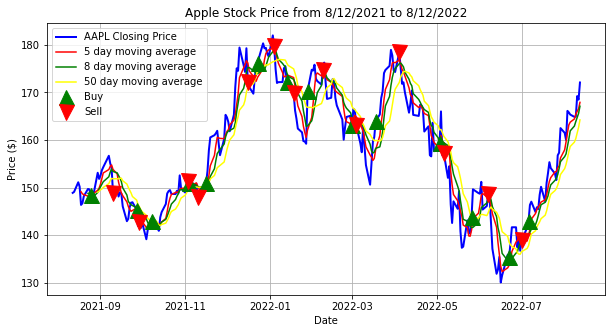

In [22]:
plt.plot(date_price, label= 'AAPL Closing Price', color= "blue", linewidth = 2)
plt.plot(five_day, label= '5 day moving average', color= "red", linewidth = 1.5)
plt.plot(eight_day, label= '8 day moving average', color= "green", linewidth = 1.5)
plt.plot(thirteen_day, label= '50 day moving average', color= "yellow", linewidth = 1.5)
plt.plot(date_price[buy_sell["Buy"] == 1], '^', markersize = 15, color = 'g', label = 'Buy')
plt.plot(date_price[buy_sell["Sell"] == 1], 'v', markersize = 15, color = 'r', label = 'Sell')
plt.grid()
plt.title("Apple Stock Price from 8/12/2021 to 8/12/2022")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [15, 5]

plt.show()

**Comments:** Looking at this graph, we can immediately discern that this trading strategy doesn't always yield profit. There are multiple occurences where the buy signal and sell signal yielded a loss (one example being on 05/22).

## Machine Learning / Data Analysis

The goal of this part of the study is to see whether a **machine can replicate these buy and sell signals** given the 5-day SMA and the 8-day SMA. 

First we have to combine the 8-day SMA and the 5-day SMA into the same array. We will take the values from the 8th data point and onwards as the 8-day SMA only starts at the 8th data point. 

In [23]:
five_days = []
eight_days = []
for x in range(len(five_day)):
    five_days.append(five_day[x])
    eight_days.append(eight_day[x])
five_days = five_days[8:]
eight_days = eight_days[8:]
five_days = np.reshape(five_days, (len(five_days), 1))
eight_days = np.reshape(eight_days, (len(eight_days), 1))
five_data = five_days.tolist() 
for x in range(len(eight_days)):
    five_data[x].append(eight_days[x][0])
five_data = np.reshape(five_data, (len(five_data), 2)) 
#above code combining and formatting 5-day SMA & 8-day SMA into the same array
print(five_data[0:25]) #let's see the first 25 values

[[148.1160004  148.87375062]
 [148.5160004  148.78125   ]
 [148.6839996  148.33374975]
 [148.7660004  148.13500025]
 [149.447998   148.9799995 ]
 [149.8899994  149.62125013]
 [150.7199982  150.16124925]
 [151.9419984  150.65374763]
 [153.0819978  151.23874863]
 [153.7959992  152.27999875]
 [154.451999   153.22624975]
 [154.7640014  153.90999988]
 [153.8280028  153.39125062]
 [152.8780028  153.10625075]
 [151.1640014  152.55750075]
 [149.948001   151.98000138]
 [148.8919982  151.29125012]
 [148.3099976  149.96249963]
 [146.9879974  148.44124975]
 [146.049997   147.111248  ]
 [145.4139984  146.72124862]
 [145.0220002  146.3812485 ]
 [145.1940002  146.23124888]
 [145.6799988  145.77374837]
 [145.376001   144.91374975]]


Now that we have the x values (the combined 8-day SMA & 5-day SMA), and the y values(the buy indicator in the buy_averages) we can train our classification model to **classify these buy signals based on the moving averages**

In [24]:
#creating RandomForestClassifier model with the x variable being the combined 5 & 8 day SMA and the y variable being the buy signals
x_train, x_test, y_train, y_test = train_test_split(five_data, buy_sell["Buy"][8:], test_size = 0.2, random_state = 0)
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_train)

Let us visualize this model. 

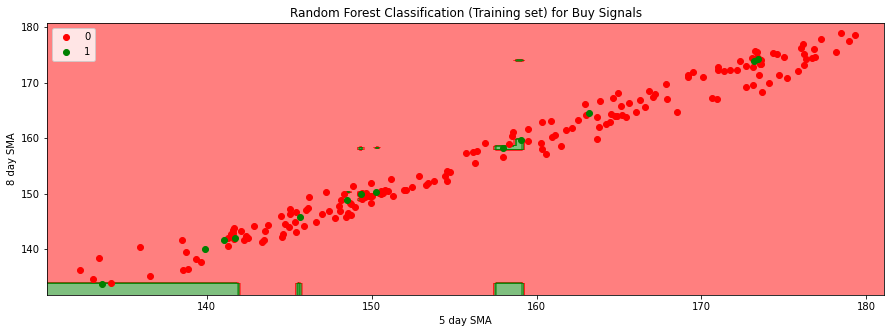

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 2, stop = X_set[:, 0].max() + 2, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 2, stop = X_set[:, 1].max() + 2, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set) for Buy Signals')
plt.xlabel('5 day SMA')
plt.ylabel('8 day SMA')
plt.legend()
plt.show()

**Comments:** This colormap allows us to see the accuracy of machine in predicting buy signals. If a data point is its respective color area then the machine has predicted the buy signal correctly ( red dot in red area & green dot in green area). Overall the machine seems to be pretty accurate wtih only some green dots appearing in the red area and vice versa. 

To further determine the accuracy of this model, let's calculate the **accuracy score and confusion matrix**. 

In [26]:
print(accuracy_score(y_train, y_pred))

0.9795918367346939


our model is 97.96% accurate when comparing the predicted values with the x_train values. 

[[183   0]
 [  4   9]]


[Text(0, 0.5, 'Not a Buy Signal'), Text(0, 1.5, 'Buy Signal')]

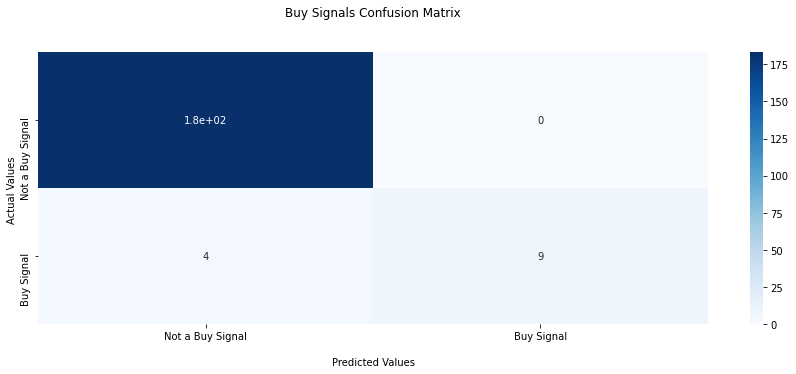

In [27]:
cm = confusion_matrix(y_train, y_pred)
print(cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues') #Displaying confusion matrix in a heatmap
ax.set_title('Buy Signals Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not a Buy Signal','Buy Signal'])
ax.yaxis.set_ticklabels(['Not a Buy Signal','Buy Signal'])


**Comments:** In looking at the confusion matrix, the model has a 100% accuracy rate in predicting the buy signal given that the actual value is not a buy signal. However, given the actual value is that of a buy signal, the model determined the wrong value 44% of the time. Statistically speaking, the only errors are that of **type II errors** which are far better than type I errors

Now let's see how the model does in predicting selling signals

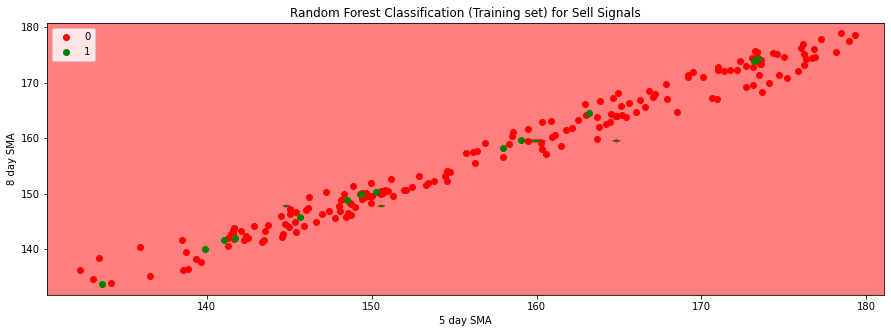

In [28]:
#Training RandomForestClassifier model on sell signals
x_train2, x_test2, y_train2, y_test2 = train_test_split(five_data, buy_sell["Sell"][8:], test_size = 0.2, random_state = 0)
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train2, y_train2)
y_pred2 = classifier.predict(x_train2)

from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 2, stop = X_set[:, 0].max() + 2, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 2, stop = X_set[:, 1].max() + 2, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set) for Sell Signals')
plt.xlabel('5 day SMA')
plt.ylabel('8 day SMA')
plt.legend()
plt.show()

**Comments:** When looking at the colormap for the sell signals, there seems to be no predominantly green areas. Thus, one may be able to assume that there isn't any errors in regards to saying it was not a sell signal when it actually is **(no type II errors)**. 

The accuracy score is the same for the buy signals model

In [29]:
print(accuracy_score(y_train2, y_pred2))

0.9795918367346939


[[187   0]
 [  4   5]]


[Text(0, 0.5, 'Not a Sell Signal'), Text(0, 1.5, 'Sell Signal')]

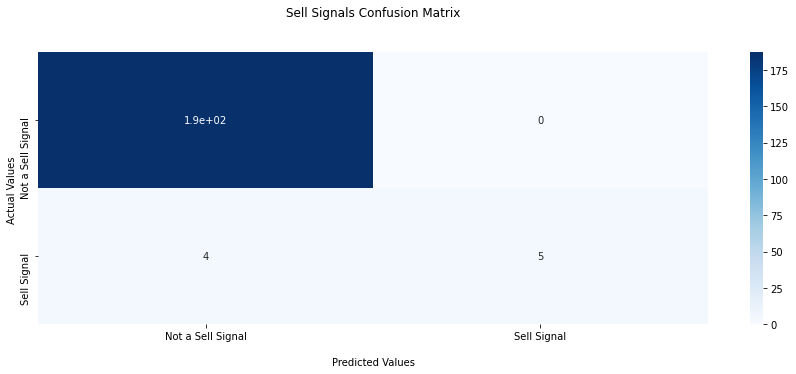

In [30]:
cm = confusion_matrix(y_train2, y_pred2)
print(cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Sell Signals Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Not a Sell Signal','Sell Signal'])
ax.yaxis.set_ticklabels(['Not a Sell Signal','Sell Signal'])


**Comments:** This confusion matrix looks quite similar to the confusion matrix for the buy signals. However, there seems to be a **far less accuracy rate** in determining whether it is a sell signal, given it is one (**55% accuracy rate**). Still no type I errors so that is good

## Sentiment Analysis on Twitter feed

The next part of this study focuses on performing a **sentiment analysis** on tweets made regarding Apple to see whether there is a **correlation between profit made trading a specific day and a high/low sentiment**. Additioanlly, we will also see whether a low/high sentiment **affects whether the closing stock price is higher or lower than the opening stock price**. Since our trading strategy focuses on moving averages, we will be seeing how news/twitter sentiment affects these moving averages which in turn affects our trading strategy

The first thing we have to do is record the start_prices and end_prices of the Apple stock for each day

In [31]:
start_prices = []
end_prices = []
start_prices.append(df["Open"][0])
dates = []
for index in range(len(date_price)):
    end_prices.append(df["Close"][index])
    start_prices.append(df["Open"][index])

Since our data starts with the day 8/12/2021, we want to get the twitter sentiment during that day and not the present day. So let's create a function that takes in the difference in days between the present and the recorded day in the data and returns a list of tweets that are related to Apple.

In [32]:
def tweetsAtDate(days):
    now = dt.date.today() # gets today's date
    dayBefore = now - timedelta(days = days) #gets the date of recorded stock price in the data
    dayAfter = now - timedelta(days = (days + 1)) #gets the day after this ^
    now = now.strftime('%Y-%m-%d')
    dayBefore = dayBefore.strftime('%Y-%m-%d') #converts to Datetime object
    dayAfter = dayAfter.strftime('%Y-%m-%d') #converts to Datetime object
    tweets = []
    #iterates through all tweets that are not links or replies
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper("Apple stock" + ' lang:en since:' +  dayAfter + ' until:' + dayBefore + ' -filter:links -filter:replies').get_items()):
        tweets.append([tweet.date, tweet.content ]) #appends a tweet's date and content during a specific day that talks about Apple Stock
    return tweets

Now it is obvious that all of the tweets that mention Apple is not going to be in regards to the stock/company-related. Most of these types of tweets occur as retweets, mentions, or hyperlinks. This method will remove these tweets using regex.

In [33]:
def cleanTweet(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('gc', '', text) #Removing giftcards
    text = re.sub('giftcard', '', text) #Removing gift cards
    text = re.sub('#', '', text) # Removing '#' 
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

Now that we have all the tweets, it is  time to perform a **sentiment intensity analyzer on them**. We will perform sentiment analysis on these tweets and append each **tweet's compounded sentiment score (positive + negative)** into a list before return the total sentiment score for the entire day. 

In [34]:
def getSentiment(tweets):
    all_tweets = pd.DataFrame(tweets, columns=['Date','Content']) #creating a DataFrame for easier visualization
    all_tweets["Content"] = all_tweets["Content"].apply(cleanTweet) #filtering the tweets using function above
    compounded_sentiment = [] # creating list for sentiment scores of tweets for the specific day
    for x in all_tweets["Content"]: #iterating through the content of the tweets
        analyzer = SentimentIntensityAnalyzer().polarity_scores(x) #getting sentiment score
        compounded_sentiment.append(analyzer['compound']) #appending compounded sentiment score to the list
    return sum(compounded_sentiment) #returning the sum of all sentiment scores


The last step is to run the getSentiment function on all the tweets. To easily visualize and compare the specific date, opening price, closing price, profit, and sentiment, we are going to create a dataframe to encapsulate these values

In [35]:
sentiment_prices = []
for i in range(len(end_prices)): #iterates through all of the days in the data
    part1 = df["Date"][i].replace("-", "/") #formatting stuff to convert string dates into Datetime Object
    part2 = int(part1[0:4]) - 2000 #formatting stuff to convert string dates into Datetime Object
    part1 = part1.replace(part1[0:4], str(part2)) #formatting stuff to convert string dates into Datetime Object
    date_time_obj = datetime.strptime(part1, '%y/%m/%d') #formatting stuff to convert string dates into Datetime Object
    date_time_obj2 = datetime.now() #calculates today's date
    delta = date_time_obj2-date_time_obj #find the difference in days between date in data and today
    #appends opening price, close price, profit, and compounded sentiment for that day into a list
    sentiment_prices.append([start_prices[i], end_prices[i], end_prices[i] - start_prices[i], getSentiment(tweetsAtDate(delta.days))])
    #converts the list into a DataFrame
sentiment_scores = pd.DataFrame(sentiment_prices, columns=['Start Price','End Price', 'Profit/Loss', "Sentiment Score"])
print(sentiment_scores)



     Start Price   End Price  Profit/Loss  Sentiment Score
0     146.190002  148.889999     2.699997           3.6414
1     146.190002  149.100006     2.910004           0.8579
2     148.970001  151.119995     2.149994           2.7924
3     148.539993  150.190002     1.650009           4.3562
4     150.229996  146.360001    -3.869995           3.1329
..           ...         ...          ...              ...
248   163.210007  164.869995     1.659988           2.7522
249   166.369995  164.919998    -1.449997           0.4748
250   164.020004  169.240005     5.220001           2.5316
251   167.679993  168.490005     0.810012          -0.0997
252   170.059998  172.100006     2.040008           4.8162

[253 rows x 4 columns]


**Comments:** Looking at the last 2 columns in the DataFrame it is hard to spot a correlation between the Profit/Loss of a stock and the sentiment score. One example is in row 4, a high positive sentiment score resulted in a massive dip in stock price. Similarily in row 251, a negative sentiment score resulted in a overall positive change in the stock price. To accurately assess the **strength of the linear relationship** between these 2 variables, I will **calculate the Pearson's coefficient**.

### Relationship between Profit/Loss and Sentiment Score

In [36]:
from scipy.stats import pearsonr
corr, _ = pearsonr(sentiment_scores['Profit/Loss'], sentiment_scores["Sentiment Score"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.070


**Comments:** A correlation value of 0.069 demonstrates that there is a positive correlation but it is very minimal. It may be the case that a linear relationship isn't a suitable way to measure the correlation between these 2 variables so I will also calculate the Spearman Score. 

In [37]:
from scipy.stats import spearmanr
corr2, _ = spearmanr(sentiment_scores['Profit/Loss'], sentiment_scores["Sentiment Score"])
print('Spearmans correlation: %.3f' % corr2)

Spearmans correlation: 0.147


**Comments:** The spearman score shows there to also be a positive correlation between the 2 variables, but again not super noteble.

## Incorporating Sentiment Scores into the Buy Signals

The next step is to incorporate the sentiment scores we generated above into finding the buy signals with moving average. The goal is to only buy the stock when the 5 day SMA crosses the 8 day SMA and the sentiment score for that stock is positive

First lets reset the values in our buy_sell DataFrame and then add the sentiment score column.

In [38]:
buy_sell["Buy"] = 0
buy_sell["Sell"] = 0
buy_sell["Sentiment"] = 0.0
sentiment_scores = sentiment_scores.set_index(buy_sell.index) #have to make both DataFrames use the same index
buy_sell["Sentiment"] = sentiment_scores["Sentiment Score"]
print(buy_sell)


                 Price  Buy  Sell  Profit  Sentiment
Date                                                
2021-08-12  148.889999    0     0     0.0     3.6414
2021-08-13  149.100006    0     0     0.0     0.8579
2021-08-16  151.119995    0     0     0.0     2.7924
2021-08-17  150.190002    0     0     0.0     4.3562
2021-08-18  146.360001    0     0     0.0     3.1329
...                ...  ...   ...     ...        ...
2022-08-08  164.869995    0     0     0.0     2.7522
2022-08-09  164.919998    0     0     0.0     0.4748
2022-08-10  169.240005    0     0     0.0     2.5316
2022-08-11  168.490005    0     0     0.0    -0.0997
2022-08-12  172.100006    0     0     0.0     4.8162

[253 rows x 5 columns]


Here we add logic to only create a buy signal if the 5 day SMA crosses the 8 day SMA and the overall sentiment for the stock during that day is positive.

In [39]:
data = 0.0
bought = False
for x in range(0, len(date_price) - 1):
    first = price_averages["Position"][x] 
    second = price_averages["Position"][x + 1]
    if first!= second:
        if first == 1 and bought == True: 
            buy_sell["Sell"][x] = 1
            buy_sell["Profit"][x] = date_price[x] - data
            bought = False
        elif buy_sell["Sentiment"][x] > 0:
            buy_sell["Buy"][x] = 1
            data = date_price[x]
            bought = True


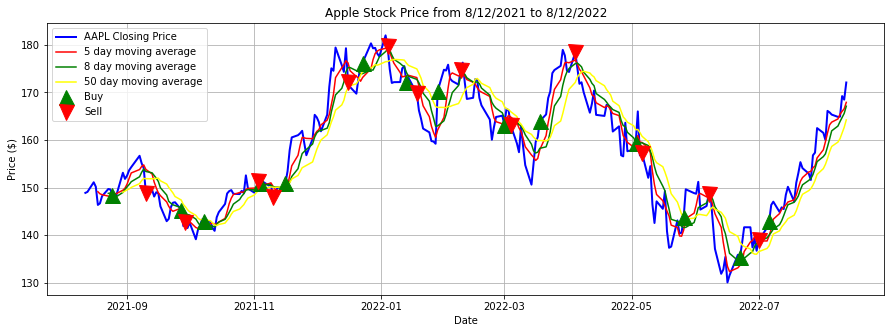

In [40]:

plt.plot(date_price, label= 'AAPL Closing Price', color= "blue", linewidth = 2)
plt.plot(five_day, label= '5 day moving average', color= "red", linewidth = 1.5)
plt.plot(eight_day, label= '8 day moving average', color= "green", linewidth = 1.5)
plt.plot(thirteen_day, label= '50 day moving average', color= "yellow", linewidth = 1.5)
plt.plot(date_price[buy_sell["Buy"] == 1], '^', markersize = 15, color = 'g', label = 'Buy')
plt.plot(date_price[buy_sell["Sell"] == 1], 'v', markersize = 15, color = 'r', label = 'Sell')
plt.grid()
plt.title("Apple Stock Price from 8/12/2021 to 8/12/2022")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [15, 5]

plt.show()


**Comments:** Interestingly enough the graph is the same as before. It looks like the overall sentiment score was already positive for the days where it was indicative to buy the stock. 

In [41]:
print(buy_sell[buy_sell["Buy"] == 1])

                 Price  Buy  Sell  Profit  Sentiment
Date                                                
2021-08-25  148.360001    1     0     0.0     4.0292
2021-09-27  145.369995    1     0     0.0     3.7462
2021-10-08  142.899994    1     0     0.0     4.1116
2021-11-04  150.960007    1     0     0.0     4.1245
2021-11-16  151.000000    1     0     0.0     1.5870
2021-12-23  176.279999    1     0     0.0     4.1088
2022-01-13  172.190002    1     0     0.0     2.6619
2022-01-28  170.330002    1     0     0.0     8.4735
2022-03-01  163.199997    1     0     0.0     3.7505
2022-03-18  163.979996    1     0     0.0     1.8548
2022-05-03  159.479996    1     0     0.0     1.6863
2022-05-26  143.779999    1     0     0.0     4.4819
2022-06-22  135.350006    1     0     0.0     1.1923
2022-07-06  142.919998    1     0     0.0     0.3877


In [42]:
print(sum(buy_sell["Profit"]))

51.150007999999985


Looks like the overall profit our trading algorithm made is **$51.15**! 

## Final Thoughts

Let's answer some of the questions we had in the beginning of the study. 

The purpose of this study was to determine whether algorithmic trading with technical analysis provides an advantage to traders and to what extent. 

Our study's profit of 51 dollars indicates that technical analysis does provide an advantage to traders. Now although 51 dollars over 1 year isn't something to be boastful about, it should be stated that traders would **most likely be doing option trading with this model and not individual buying and selling one stock**. Options trading **exponentially increases the profits**, so the actual profits when trading could be in the thousands of dollars.

Now regarding the accuracy of the sentiment analysis. As mentioned above, I tried to filter out the tweets that were irrelevant to the performance of the Apple Stock, but I am sure that I was not able to filter all of them. To demonstrate this, I have generated a word cloud of the tweets regarding Apple 270 days ago.



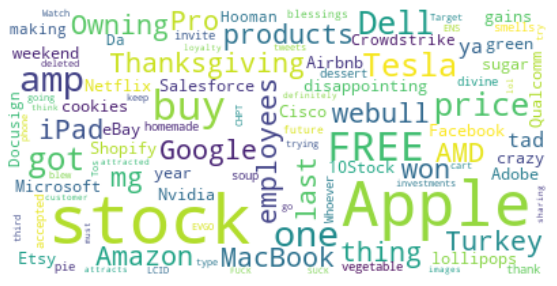

In [43]:
tweets2 = pd.DataFrame(tweetsAtDate(270), columns=['Date','Content'])
tweets2["Content"] = tweets2["Content"].apply(cleanTweet) 
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(''.join(tweets2["Content"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As you can see some of the most common words are thanksgiving, turkey, or cookies all which are irrelavent to Apple Corporation. As a result, the sentiment_scores may be skewed and **may not be representative of a stock's actual twitter sentiment for that day**. Naturally this could be improved by including more regex filtering for other keywords/phrases.

My last point is in regards to the 5-8-13 SMA trading strategy. In theory this strategy is supposed to be used for day trading, and a longer timeframe SMA like 10-20-50 is supposed to be used for swing trading. I used the 5-8-13 SMA strategy in hopes of creating multiple buy/sell signals to display in this study rather than just 1 or 2. Regardless, this study did **demonstrate that the 5-8-13 SMA can be used for swing trading**